<a href="https://colab.research.google.com/github/qetibakh/ML-Final/blob/main/data-handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading and Initial Inspection

In [7]:
import os
from google.colab import drive
drive.mount('/content/drive')

os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/kaggle credentials"

# Install the Kaggle API client
!pip install kaggle

# Download the competition data
!kaggle competitions download -c walmart-recruiting-store-sales-forecasting

# Unzip the downloaded data into your current directory (your repo folder)
!unzip walmart-recruiting-store-sales-forecasting.zip -d ./data

# Unzip the individual CSV files within the data directory
!unzip ./data/features.csv.zip -d ./data
!unzip ./data/sampleSubmission.csv.zip -d ./data
!unzip ./data/test.csv.zip -d ./data
!unzip ./data/train.csv.zip -d ./data


# List files to verify
!ls -l data/

Mounted at /content/drive
  0% 0.00/2.70M [00:00<?, ?B/s]
100% 2.70M/2.70M [00:00<00:00, 778MB/s]
Archive:  walmart-recruiting-store-sales-forecasting.zip
  inflating: ./data/features.csv.zip  
  inflating: ./data/sampleSubmission.csv.zip  
  inflating: ./data/stores.csv       
  inflating: ./data/test.csv.zip     
  inflating: ./data/train.csv.zip    
Archive:  ./data/features.csv.zip
  inflating: ./data/features.csv     
Archive:  ./data/sampleSubmission.csv.zip
  inflating: ./data/sampleSubmission.csv  
Archive:  ./data/test.csv.zip
  inflating: ./data/test.csv         
Archive:  ./data/train.csv.zip
  inflating: ./data/train.csv        
total 20916
-rw-r--r-- 1 root root   592289 Feb  3  2014 features.csv
-rw-r--r-- 1 root root   161700 Dec 11  2019 features.csv.zip
-rw-r--r-- 1 root root  2146739 Feb  3  2014 sampleSubmission.csv
-rw-r--r-- 1 root root   225538 Dec 11  2019 sampleSubmission.csv.zip
-rw-r--r-- 1 root root      532 Dec 11  2019 stores.csv
-rw-r--r-- 1 root root  259

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
# Make sure to load the unzipped .csv files
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
features_df = pd.read_csv('./data/features.csv')
stores_df = pd.read_csv('./data/stores.csv')

print("--- Train Data Info ---")
train_df.info()
print("\n--- Features Data Info ---")
features_df.info()
print("\n--- Stores Data Info ---")
stores_df.info()

print("\n--- Train Data Head ---")
print(train_df.head())
print("\n--- Train Data Description ---")
print(train_df.describe())

--- Train Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB

--- Features Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   Ma

## Data Merging and Date Conversion

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' columns to datetime objects in all relevant dataframes
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])
features_df['Date'] = pd.to_datetime(features_df['Date'])

# Merge train data with features and stores
train_merged_df = pd.merge(train_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
train_merged_df = pd.merge(train_merged_df, stores_df, on='Store', how='left')

# Create a copy of the merged dataframe before any further modifications
train_merged_df_original_type = train_merged_df.copy()


# Do the same for the test data for consistency in feature engineering later
test_merged_df = pd.merge(test_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
test_merged_df = pd.merge(test_merged_df, stores_df, on='Store', how='left')


print("\n--- Merged Train Data Info ---")
train_merged_df.info()
print("\n--- Merged Train Data Head ---")
print(train_merged_df.head())


--- Merged Train Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  objec

# Task
Analyze the provided datasets ("train.csv", "test.csv", "features.csv", "stores.csv") for the Walmart Recruiting - Store Sales Forecasting Kaggle competition, perform exploratory data analysis, engineer relevant features, research and implement various time-series forecasting models (Deep Learning, Tree-Based, Classical Statistical), track experiments using MLflow or Wandb, evaluate models using WMAE, tune hyperparameters, generate predictions on the test set using the best model loaded from a Model Registry, create a submission file for Kaggle, and document the entire process and findings in a Georgian-language README.md file, organizing all code and documentation in a GitHub repository with specific file naming conventions.

## Exploratory Data Analysis (EDA)

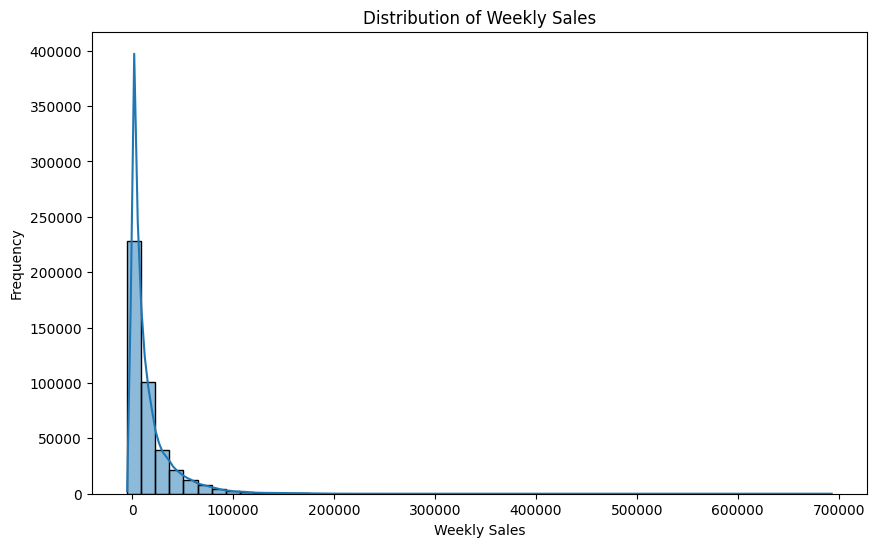

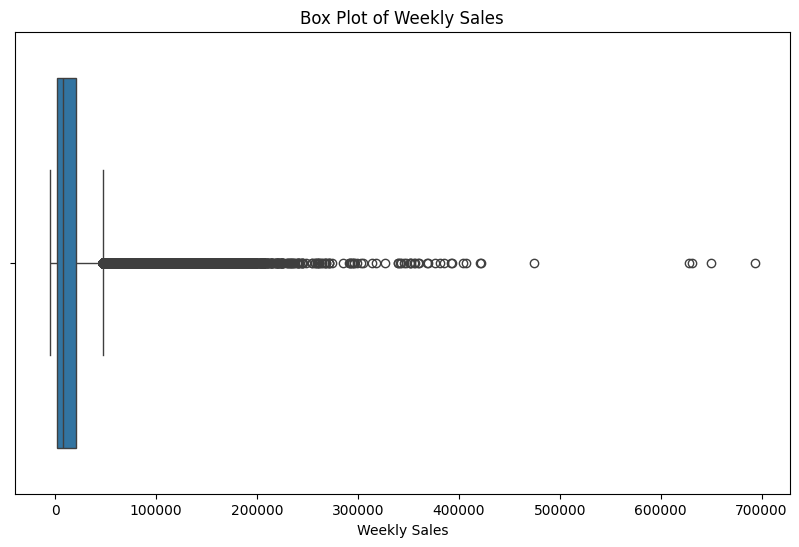

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(train_merged_df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=train_merged_df['Weekly_Sales'])
plt.title('Box Plot of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.show()

**Reasoning**:
Analyze the trend and seasonality of 'Weekly_Sales' over time by plotting weekly sales aggregated by date.



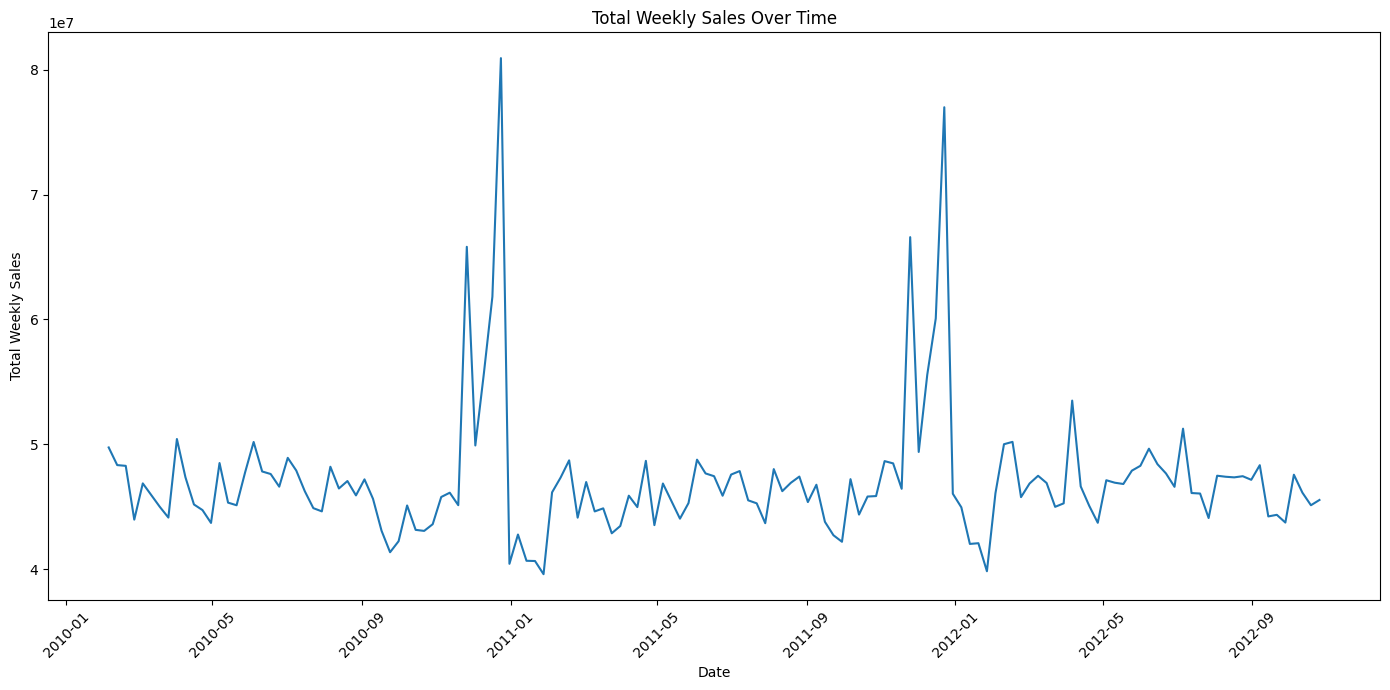

In [12]:
weekly_sales_by_date = train_merged_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=weekly_sales_by_date, x='Date', y='Weekly_Sales')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Temperature vs. Weekly Sales

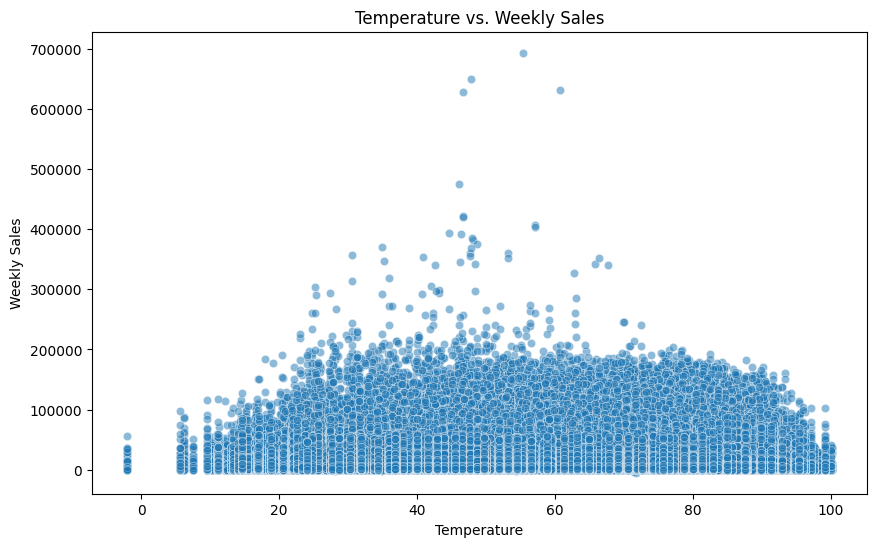

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_merged_df, x='Temperature', y='Weekly_Sales', alpha=0.5)
plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

### Weekly Sales by Store Type

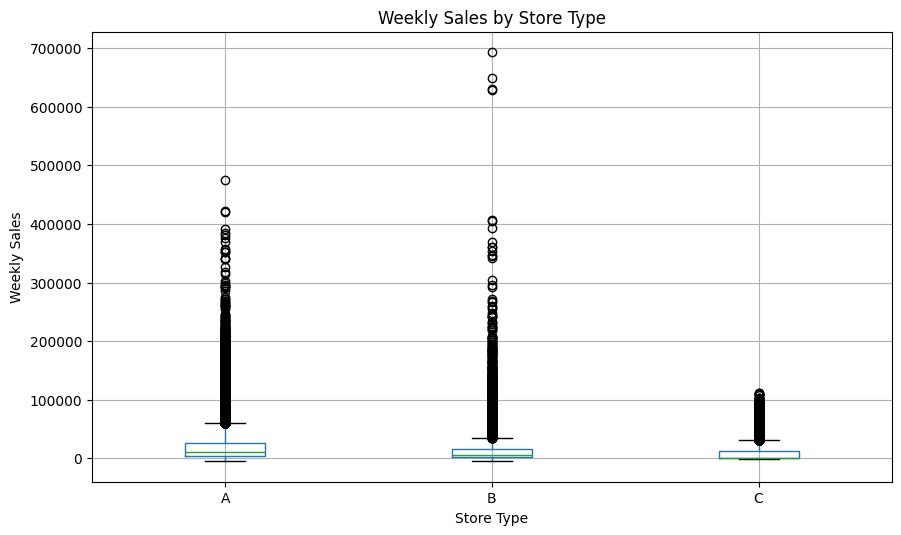

In [27]:
plt.figure(figsize=(10, 6))

if 'Type' in train_merged_df_original_type.columns:
    train_merged_df_original_type.boxplot(column='Weekly_Sales', by='Type', ax=plt.gca())
    plt.title('Weekly Sales by Store Type')
    plt.xlabel('Store Type')
    plt.ylabel('Weekly Sales')
    plt.suptitle('') # Suppress the default pandas title
    plt.show()
else:
    print("Error: 'Type' column not found in train_merged_df_original_type.")
    print("Available columns:", train_merged_df_original_type.columns)

### Weekly Sales by Store Size

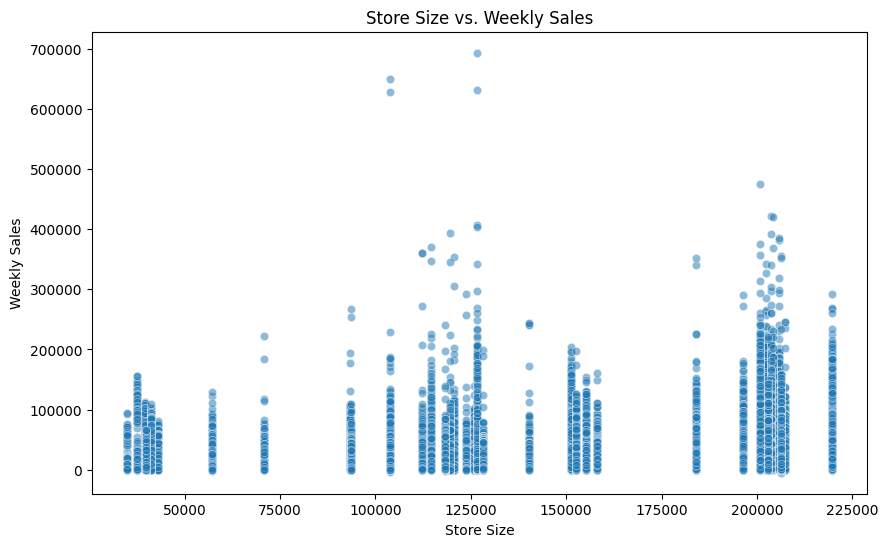

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_merged_df, x='Size', y='Weekly_Sales', alpha=0.5)
plt.title('Store Size vs. Weekly Sales')
plt.xlabel('Store Size')
plt.ylabel('Weekly Sales')
plt.show()

## Feature Engineering

In [25]:
# Feature Engineering

# Extract date features
train_merged_df['Year'] = train_merged_df['Date'].dt.year
train_merged_df['Month'] = train_merged_df['Date'].dt.month
train_merged_df['Week'] = train_merged_df['Date'].dt.isocalendar().week.astype(int)
train_merged_df['Day'] = train_merged_df['Date'].dt.day
train_merged_df['DayOfWeek'] = train_merged_df['Date'].dt.dayofweek

test_merged_df['Year'] = test_merged_df['Date'].dt.year
test_merged_df['Month'] = test_merged_df['Date'].dt.month
test_merged_df['Week'] = test_merged_df['Date'].dt.isocalendar().week.astype(int)
test_merged_df['Day'] = test_merged_df['Date'].dt.day
test_merged_df['DayOfWeek'] = test_merged_df['Date'].dt.dayofweek

# Create lag features and rolling window statistics for Weekly_Sales
# This needs to be done carefully to avoid data leakage from the future
# We will sort by Store and Date first
train_merged_df = train_merged_df.sort_values(by=['Store', 'Date'])

# Example of creating a lag feature for Weekly_Sales (lag by 1 week)
train_merged_df['Weekly_Sales_Lag1'] = train_merged_df.groupby('Store')['Weekly_Sales'].shift(1)

# Example of creating a rolling mean for Weekly_Sales (window of 4 weeks)
train_merged_df['Weekly_Sales_RollingMean4'] = train_merged_df.groupby('Store')['Weekly_Sales'].rolling(window=4).mean().reset_index(level=0, drop=True)


# Handle missing values in MarkDown columns
# We can fill NaN values with 0, assuming that NaN means no markdown was applied
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
train_merged_df[markdown_cols] = train_merged_df[markdown_cols].fillna(0)
test_merged_df[markdown_cols] = test_merged_df[markdown_cols].fillna(0)

# Handle missing values in CPI and Unemployment (if any after merging)
# For simplicity, we'll fill with the mean for now, but more sophisticated methods can be used
train_merged_df['CPI'] = train_merged_df['CPI'].fillna(train_merged_df['CPI'].mean())
train_merged_df['Unemployment'] = train_merged_df['Unemployment'].fillna(train_merged_df['Unemployment'].mean())

test_merged_df['CPI'] = test_merged_df['CPI'].fillna(test_merged_df['CPI'].mean())
test_merged_df['Unemployment'] = test_merged_df['Unemployment'].fillna(test_merged_df['Unemployment'].mean())


print("\n--- Merged Train Data Info after Feature Engineering ---")
train_merged_df.info()
print("\n--- Merged Train Data Head after Feature Engineering ---")
print(train_merged_df.head())


--- Merged Train Data Info after Feature Engineering ---
<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      421570 non-null  int64         
 1   Dept                       421570 non-null  int64         
 2   Date                       421570 non-null  datetime64[ns]
 3   Weekly_Sales               421570 non-null  float64       
 4   IsHoliday                  421570 non-null  bool          
 5   Temperature                421570 non-null  float64       
 6   Fuel_Price                 421570 non-null  float64       
 7   MarkDown1                  421570 non-null  float64       
 8   MarkDown2                  421570 non-null  float64       
 9   MarkDown3                  421570 non-null  float64       
 10  MarkDown4                  421570 non-null  float64       
 11 

In [30]:
# Refined Feature Engineering

# --- Enhanced Holiday Features ---

# Define major holiday dates (example - you might need to adjust these based on exact dates in the dataset)
# Thanksgiving is typically the 4th Thursday in November
# Christmas is December 25th
from datetime import date, timedelta
import pandas as pd # Import pandas to use Timestamp

def days_from_holiday(date_ts, holiday_ts):
    """Calculates the number of days from a given date (Timestamp) to a holiday date (Timestamp)."""
    if date_ts < holiday_ts:
        return (holiday_ts - date_ts).days
    else:
        # Return days after the holiday, or a large number if holiday is in the past year
        # This simplified approach might need refinement for multi-year data
        return (date_ts - holiday_ts).days # Or a large number if date_ts > holiday_ts

# Approximate dates for major holidays in the dataset timeframe (adjust as needed)
# Convert datetime.date objects to pandas Timestamp objects
thanksgiving_dates = [pd.Timestamp(date(2010, 11, 25)), pd.Timestamp(date(2011, 11, 24)), pd.Timestamp(date(2012, 11, 22))]
christmas_dates = [pd.Timestamp(date(2010, 12, 25)), pd.Timestamp(date(2011, 12, 25)), pd.Timestamp(date(2012, 12, 25))]

def add_holiday_features(df):
    df['Days_To_Thanksgiving'] = df['Date'].apply(lambda x: min([abs((x - td)).days for td in thanksgiving_dates]))
    df['Days_To_Christmas'] = df['Date'].apply(lambda x: min([abs((x - cd)).days for cd in christmas_dates]))
    # Note: The logic below calculates days from/to the listed holidays, not necessarily the *nearest* future holiday.
    # For a competition, you might want more sophisticated logic to find the nearest upcoming holiday.
    df['IsThanksgivingWeek'] = df['Days_To_Thanksgiving'].apply(lambda x: 0 <= x < 7) # Within 7 days before/after based on listed dates
    df['IsChristmasWeek'] = df['Days_To_Christmas'].apply(lambda x: 0 <= x < 7) # Within 7 days before/after based on listed dates
    return df

train_merged_df = add_holiday_features(train_merged_df)
test_merged_df = add_holiday_features(test_merged_df)

# --- Markdown Interaction Features ---

# Example: Interaction between MarkDown1 and IsHoliday
train_merged_df['MarkDown1_IsHoliday'] = train_merged_df['MarkDown1'] * train_merged_df['IsHoliday']
test_merged_df['MarkDown1_IsHoliday'] = test_merged_df['MarkDown1'] * test_merged_df['IsHoliday']

# You can add more interactions for other MarkDown columns and/or store type/size


# --- More Granular Date Features ---

# Week of year as categorical (useful for capturing patterns in specific weeks like week 42)
train_merged_df['Week_OfYear_Cat'] = train_merged_df['Week'].astype('category')
test_merged_df['Week_OfYear_Cat'] = test_merged_df['Week'].astype('category')

# Quarter of the year
train_merged_df['Quarter'] = train_merged_df['Date'].dt.quarter
test_merged_df['Quarter'] = test_merged_df['Date'].dt.quarter


print("\n--- Merged Train Data Info after Refined Feature Engineering ---")
train_merged_df.info()
print("\n--- Merged Train Data Head after Refined Feature Engineering ---")
print(train_merged_df.head())


--- Merged Train Data Info after Refined Feature Engineering ---
<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      421570 non-null  int64         
 1   Dept                       421570 non-null  int64         
 2   Date                       421570 non-null  datetime64[ns]
 3   Weekly_Sales               421570 non-null  float64       
 4   IsHoliday                  421570 non-null  bool          
 5   Temperature                421570 non-null  float64       
 6   Fuel_Price                 421570 non-null  float64       
 7   MarkDown1                  421570 non-null  float64       
 8   MarkDown2                  421570 non-null  float64       
 9   MarkDown3                  421570 non-null  float64       
 10  MarkDown4                  421570 non-null  float64    

## Handling Categorical Features and Data Splitting

In [26]:
# Handle Categorical Features (One-Hot Encoding for 'Type')
# Create a copy of the dataframe before one-hot encoding to keep the original 'Type' column for plotting
train_merged_df_original_type = train_merged_df.copy()

train_merged_df = pd.get_dummies(train_merged_df, columns=['Type'], prefix='Store_Type')
test_merged_df = pd.get_dummies(test_merged_df, columns=['Type'], prefix='Store_Type')

# Time-Series Data Splitting
# Choose a date to split the training data into training and validation sets
# For example, let's use the last few months of data for validation
split_date = '2012-07-01'

train_data = train_merged_df[train_merged_df['Date'] < split_date].copy()
val_data = train_merged_df[train_merged_df['Date'] >= split_date].copy()

print("Shape of training data:", train_data.shape)
print("Shape of validation data:", val_data.shape)
print("Shape of test data:", test_merged_df.shape)

# Display the head of the dataframes with the new encoded columns
print("\n--- Training Data Head after Encoding and Splitting ---")
print(train_data.head())
print("\n--- Validation Data Head after Encoding and Splitting ---")
print(val_data.head())
print("\n--- Test Data Head after Encoding ---")
print(test_merged_df.head())

Shape of training data: (371242, 25)
Shape of validation data: (50328, 25)
Shape of test data: (115064, 22)

--- Training Data Head after Encoding and Splitting ---
     Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0        1     1 2010-02-05      24924.50      False        42.31       2.572   
143      1     2 2010-02-05      50605.27      False        42.31       2.572   
286      1     3 2010-02-05      13740.12      False        42.31       2.572   
429      1     4 2010-02-05      39954.04      False        42.31       2.572   
572      1     5 2010-02-05      32229.38      False        42.31       2.572   

     MarkDown1  MarkDown2  MarkDown3  ...  Year  Month  Week  Day  DayOfWeek  \
0          0.0        0.0        0.0  ...  2010      2     5    5          4   
143        0.0        0.0        0.0  ...  2010      2     5    5          4   
286        0.0        0.0        0.0  ...  2010      2     5    5          4   
429        0.0        0.0   

In [31]:
!pip install wandb

In [33]:
import wandb
from google.colab import userdata

# Log in to your Wandb account using the API key stored in Colab Secrets
try:
    wandb_api_key = userdata.get('WANDB_API_KEY')
    if wandb_api_key:
        wandb.login(key=wandb_api_key)
        print("Wandb login successful!")
    else:
        print("Wandb API key not found in Colab Secrets. Please add it.")
except Exception as e:
    print(f"Wandb login failed: {e}")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: qetibaxtura (qetibaxtura-free-university-of-tbilisi-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Wandb login successful!


In [34]:
# Example of initializing a Wandb run
# Replace 'walmart-sales-forecasting' with your project name
# Replace 'lightgbm-model-run-1' with a descriptive name for your run
try:
    run = wandb.init(project='walmart-sales-forecasting', name='initial-model-run')
    print(f"Wandb run initialized: {run.name}")
    # You can now log parameters, metrics, etc. within this run
    # For example:
    # wandb.log({"example_metric": 0.1})
    # wandb.config.update({"learning_rate": 0.01})

except Exception as e:
    print(f"Wandb run initialization failed: {e}")

# Remember to call wandb.finish() at the end of your training run
# run.finish()

Wandb run initialized: initial-model-run
